In [ ]:
#install pytrends
!pip install pytrends
# !pip install --upgrade google-cloud-language
# !pip install google-api-python-client
# !pip install --upgrade google-cloud-bigquery
# !pip install inscriptis==1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


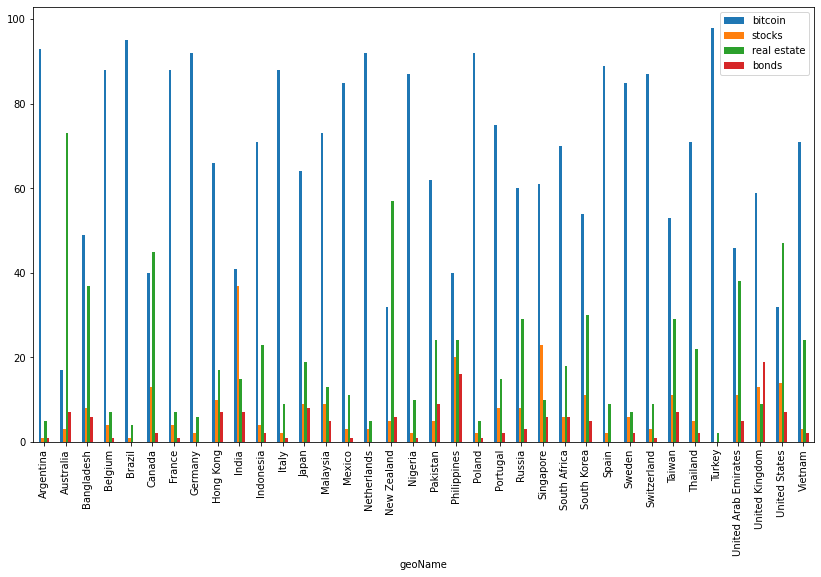

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()
#provide your search terms
kw_list=['bitcoin',
         'stocks', 
         'real estate',
         'bonds']


#search interest per region
pytrend.build_payload(kw_list, timeframe='today 12-m')

# Interest by Region
regiondf_12m = pytrend.interest_by_region()
# #looking at rows where all values are not equal to 0
regiondf_12m = regiondf_12m[regiondf_12m.sum(axis=1)!=0]

# #visualise
regiondf_12m.plot(figsize=(14, 8), y=kw_list, kind ='bar')

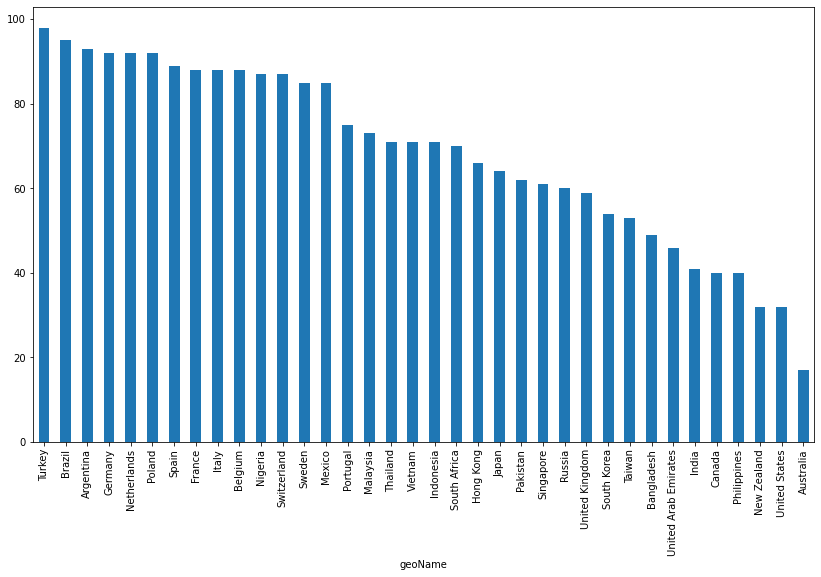

In [ ]:
regiondf_12m['bitcoin'].sort_values(ascending= False).plot(figsize=(14, 8), 
                                                           y=regiondf_12m['bitcoin'].index,
                                                           kind ='bar')

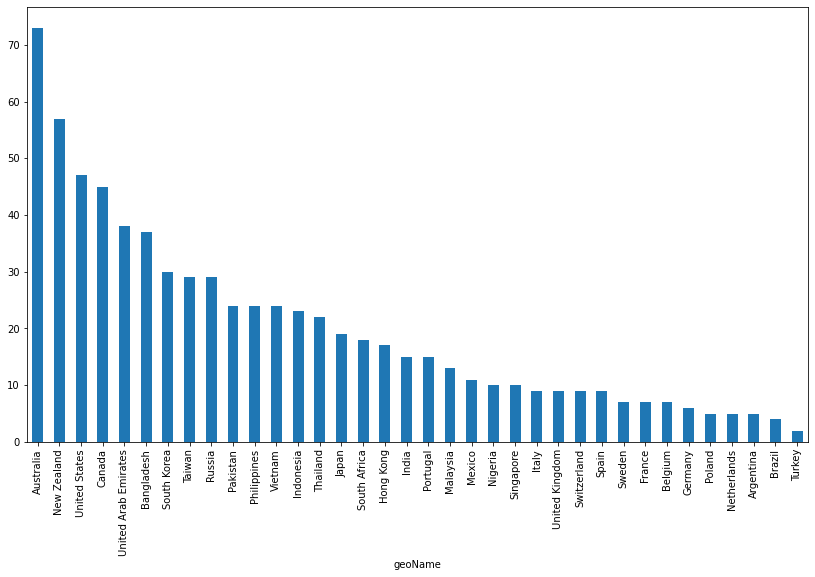

In [ ]:
regiondf_12m['real estate'].sort_values(ascending= False).plot(figsize=(14, 8), 
                                                              y=regiondf_12m['real estate'].index,
                                                              kind ='bar')

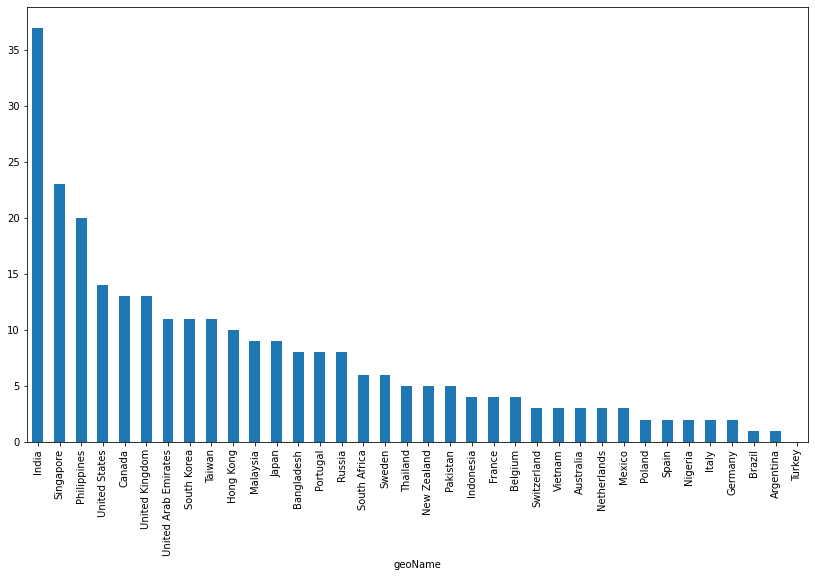

In [ ]:
regiondf_12m['stocks'].sort_values(ascending= False).plot(figsize=(14, 8), 
                                                          y=regiondf_12m['stocks'].index,
                                                          kind ='bar')

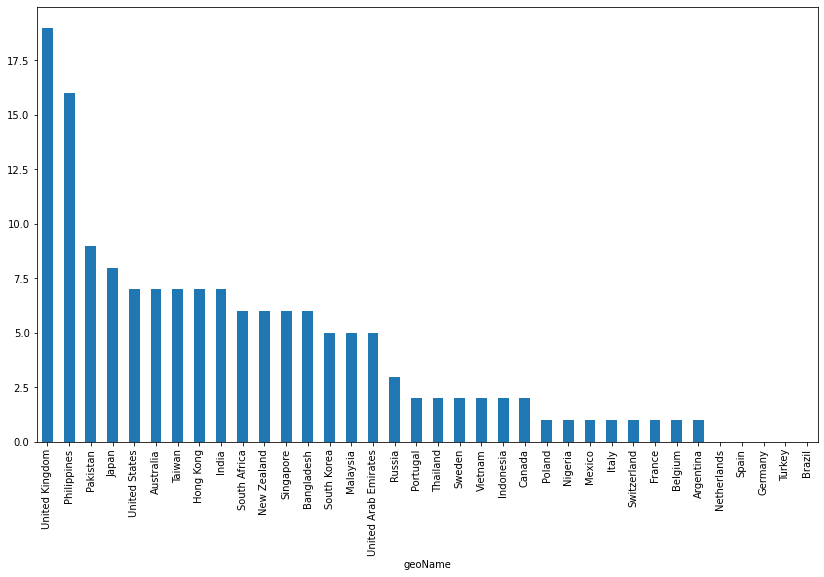

In [ ]:
regiondf_12m['bonds'].sort_values(ascending= False).plot(figsize=(14, 8), 
                                                        y=regiondf_12m['bonds'].index,
                                                        kind ='bar')

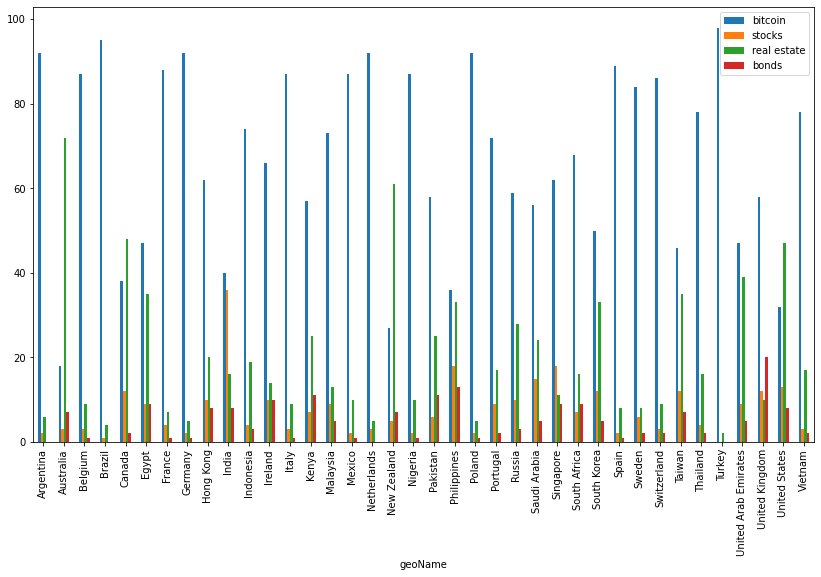

In [ ]:
#search interest per region
pytrend = TrendReq()
pytrend.build_payload(kw_list, timeframe='today 3-m')

# Interest by Region
regiondf_3m = pytrend.interest_by_region()
# #looking at rows where all values are not equal to 0
regiondf_3m = regiondf_3m[regiondf_3m.sum(axis=1)!=0]

# #visualise
regiondf_3m.plot(figsize=(14, 8), y=kw_list, kind ='bar')

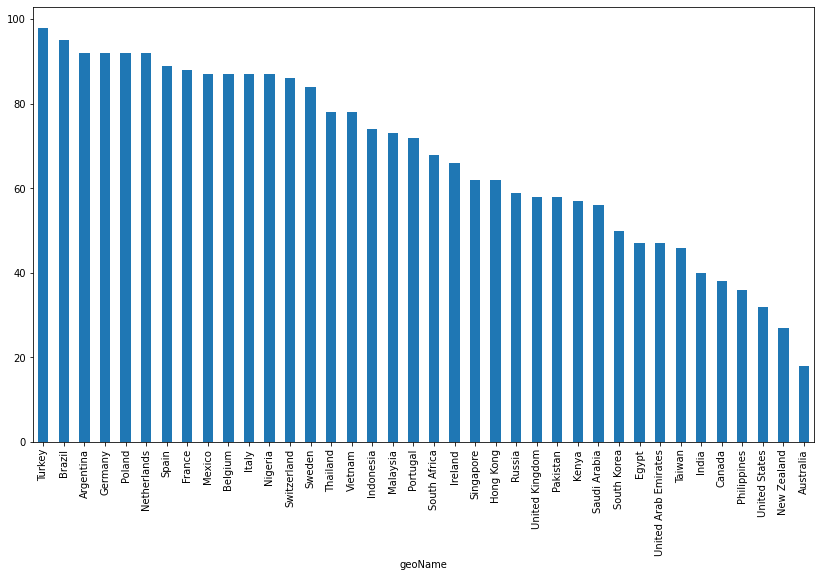

In [ ]:
regiondf_3m['bitcoin'].sort_values(ascending= False).plot(figsize=(14, 8), 
                                                          y=regiondf_3m['bitcoin'].index,
                                                          kind ='bar')

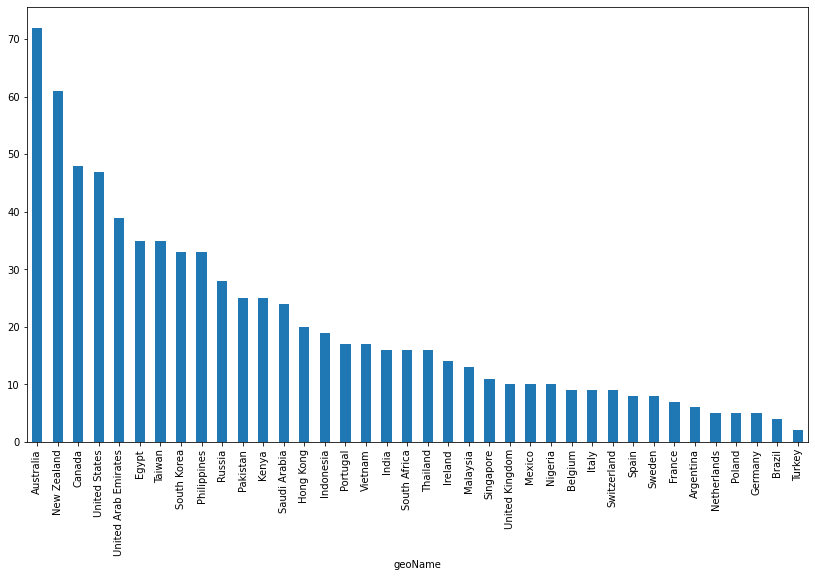

In [ ]:
regiondf_3m['real estate'].sort_values(ascending= False).plot(figsize=(14, 8), 
                                                             y=regiondf_3m['real estate'].index,
                                                             kind ='bar')

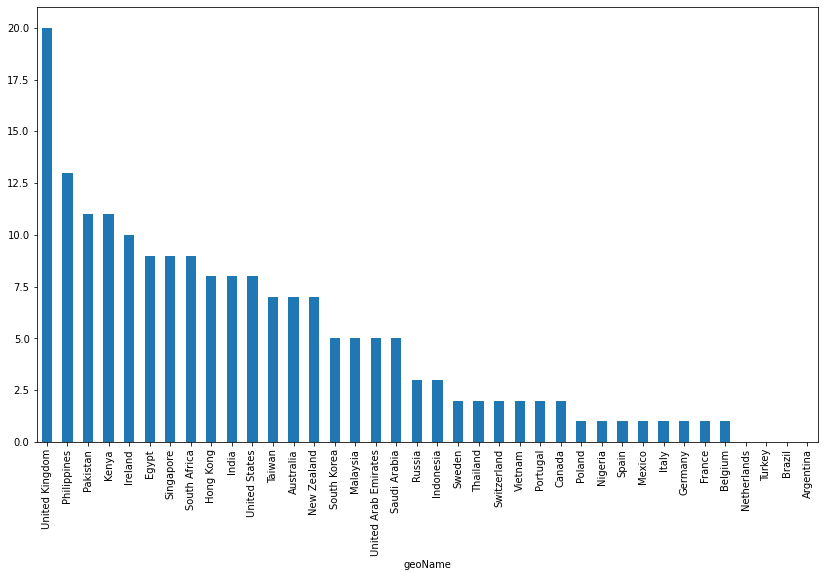

In [ ]:
regiondf_3m['bonds'].sort_values(ascending= False).plot(figsize=(14, 8), 
                                                        y=regiondf_3m['bonds'].index,
                                                        kind ='bar')

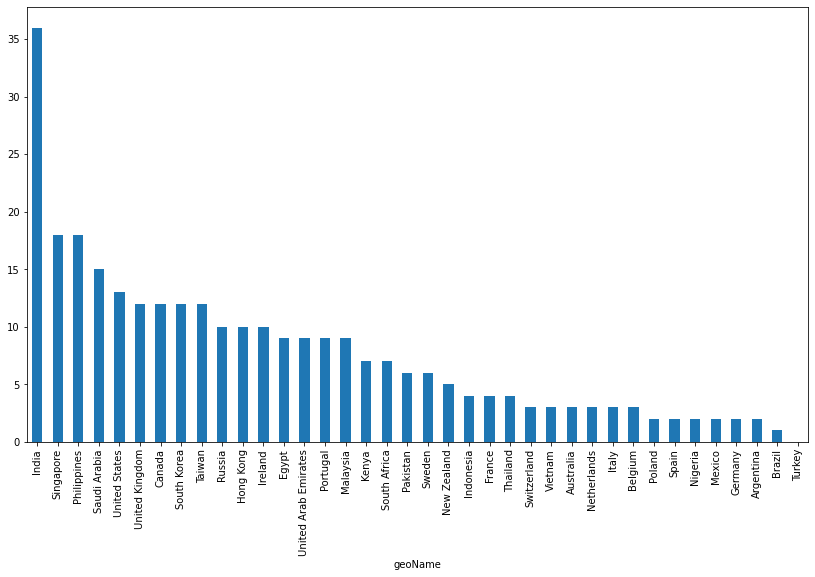

In [ ]:
regiondf_3m['stocks'].sort_values(ascending = False).plot(figsize=(14, 8), 
                                                          y=regiondf_3m['stocks'].index,
                                                          kind ='bar')

In [ ]:
df = pd.DataFrame([regiondf_3m['stocks'],
                  regiondf_12m['stocks'],
                  regiondf_3m['bitcoin'],
                  regiondf_12m['bitcoin'],
                  regiondf_3m['real estate'],
                  regiondf_12m['real estate'],
                  regiondf_3m['bonds'],
                  regiondf_12m['bonds']
                  ]).T

cols = ['stocks_3m','stocks_12m','bitcoin_3m','bitcoin_12m','real_estate_3m','real_estate_12m','bonds_3m','bonds_12m']
df.columns = cols

df['diff_stocks'] = df['stocks_12m'] - df['stocks_3m']
df['diff_bitcoin'] = df['bitcoin_12m'] - df['bitcoin_3m']
df['diff_real_estate'] = df['real_estate_12m'] - df['real_estate_3m']
df['diff_bonds'] = df['bonds_12m'] - df['bonds_3m']

n_cols = ['diff_stocks','diff_bitcoin','diff_real_estate','diff_bonds']

df = df[n_cols]
df.head()

,diff_stocks,diff_bitcoin,diff_real_estate,diff_bonds
geoName,,,,
Argentina,-1.0,1.0,-1.0,1.0
Australia,0.0,-1.0,1.0,0.0
Belgium,1.0,1.0,-2.0,0.0
Brazil,0.0,0.0,0.0,0.0
Canada,1.0,2.0,-3.0,0.0


In [ ]:
df = df[df.abs().sum(axis=1)!=0]
df.head()

,diff_stocks,diff_bitcoin,diff_real_estate,diff_bonds
geoName,,,,
Argentina,-1.0,1.0,-1.0,1.0
Australia,0.0,-1.0,1.0,0.0
Belgium,1.0,1.0,-2.0,0.0
Canada,1.0,2.0,-3.0,0.0
Germany,0.0,0.0,1.0,-1.0


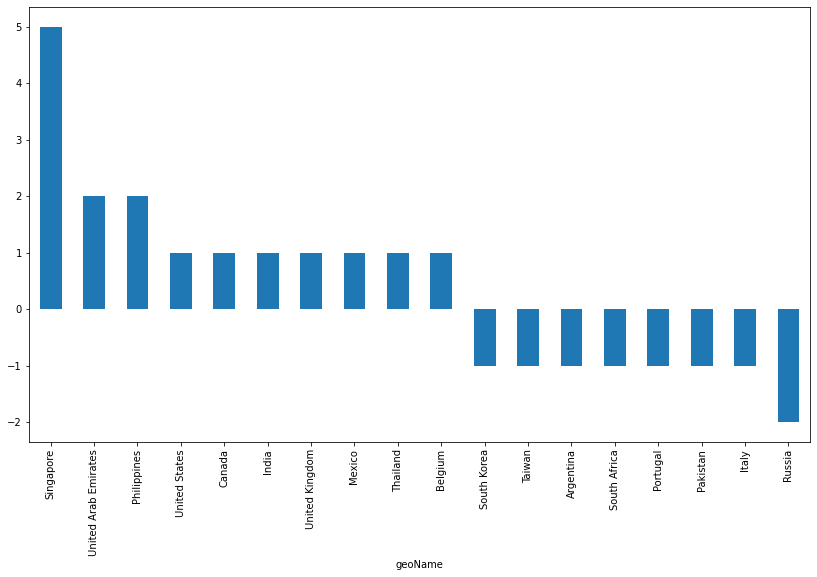

In [ ]:
df['diff_stocks'][df['diff_stocks']!=0].sort_values(ascending = False).plot(figsize=(14, 8),
                                                                            y=df['diff_stocks'][df['diff_stocks']!=0].index,
                                                                            kind ='bar')

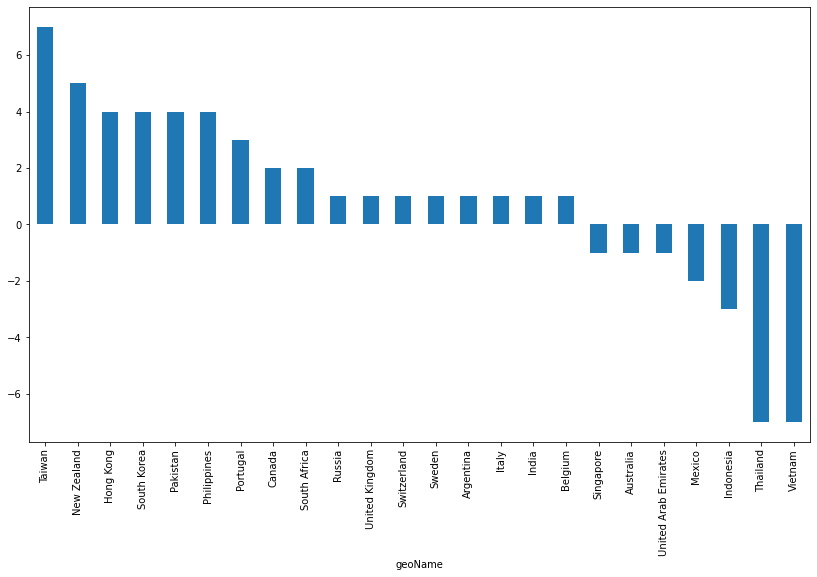

In [ ]:
df['diff_bitcoin'][df['diff_bitcoin']!=0].sort_values(ascending = False).plot(figsize=(14, 8),
                                                                            y=df['diff_bitcoin'][df['diff_bitcoin']!=0].index,
                                                                            kind ='bar')

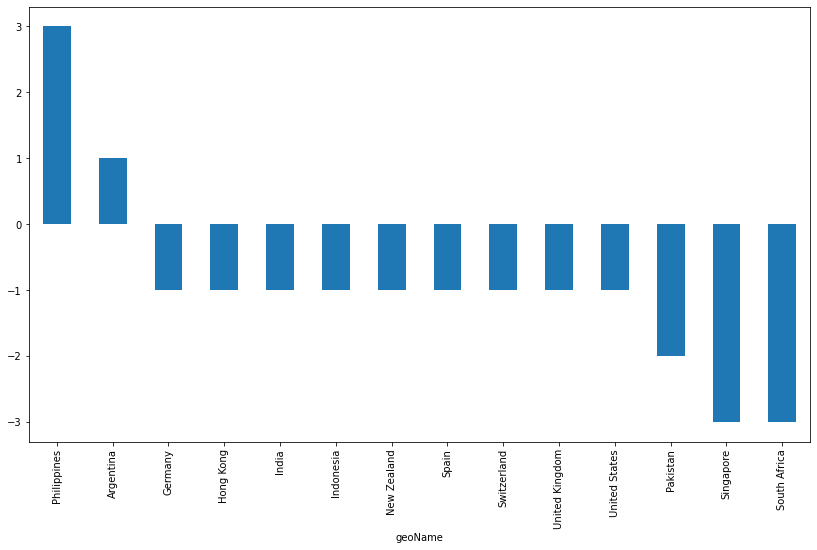

In [ ]:
df['diff_bonds'][df['diff_bonds']!=0].sort_values(ascending = False).plot(figsize=(14, 8),
                                                                            y=df['diff_bonds'][df['diff_bonds']!=0].index,
                                                                            kind ='bar')

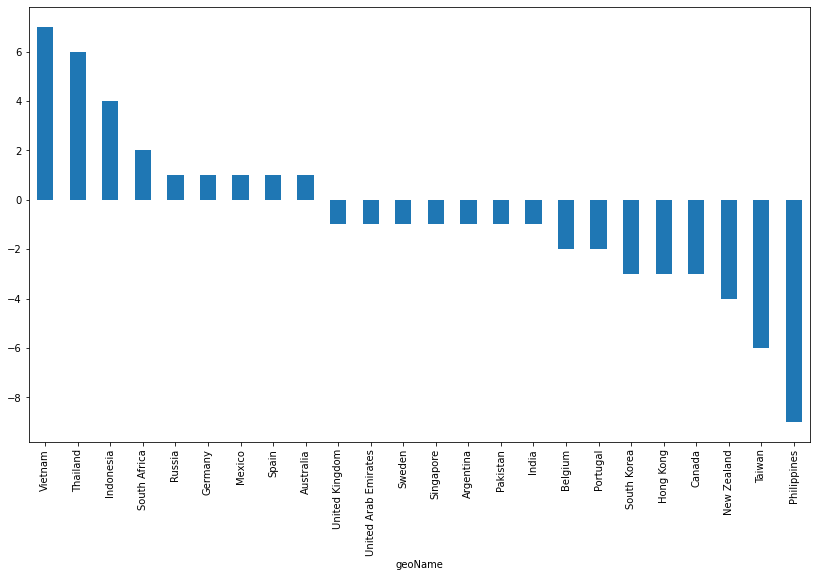

In [ ]:
df['diff_real_estate'][df['diff_real_estate']!=0].sort_values(ascending = False).plot(figsize=(14, 8),
                                                                            y=df['diff_real_estate'][df['diff_real_estate']!=0].index,
                                                                            kind ='bar')

In [ ]:
geo = ['US','CA','NZ','AU']

d_full = pd.DataFrame()
for g in geo:
  pytrend.build_payload(kw_list=['bitcoin','stocks'],geo=g,timeframe='today 12-m')
  #get related queries
  related_queries = pytrend.related_queries()

  # Bitcoin top
  d = related_queries['bitcoin']['top']
  d['source_query'] = 'bitcoin'
  d['type'] = 'top'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)

  # Bitcoin rising
  d = related_queries['bitcoin']['rising']
  d['source_query'] = 'bitcoin'
  d['type'] = 'rising'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)

  # stocks top
  d = related_queries['stocks']['top']
  d['source_query'] = 'stocks'
  d['type'] = 'top'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)

  # stocks rising
  d = related_queries['stocks']['rising']
  d['source_query'] = 'stocks'
  d['type'] = 'rising'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)
  

d_full = d_full.reset_index(drop=True)

ResponseError: ignored

In [ ]:
d_full.head(10)

,query,value,source_query,type,geo
0,bitcoin price,100,bitcoin,top,US
1,bitcoin stock,16,bitcoin,top,US
2,bitcoin stock price,13,bitcoin,top,US
3,ethereum,12,bitcoin,top,US
4,bitcoin price ethereum,11,bitcoin,top,US
5,ethereum price,11,bitcoin,top,US
6,bitcoin usd,9,bitcoin,top,US
7,bitcoin price usd,7,bitcoin,top,US
8,bitcoin today,7,bitcoin,top,US
9,price of bitcoin,6,bitcoin,top,US


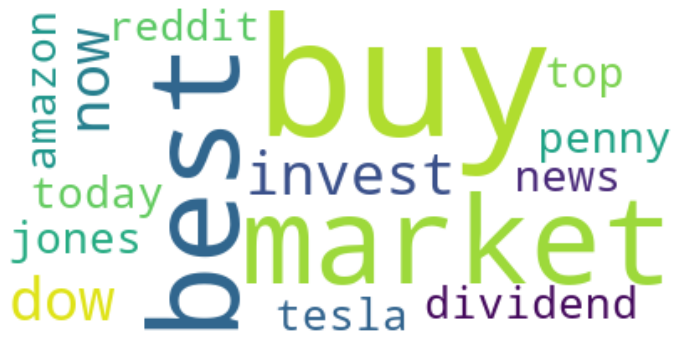

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


data = d_full[(d_full['source_query']=='stocks')&(d_full['type']=='top')&(d_full['geo']=='US')]

text = " ".join(i for i in data['query']).replace('stock','')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

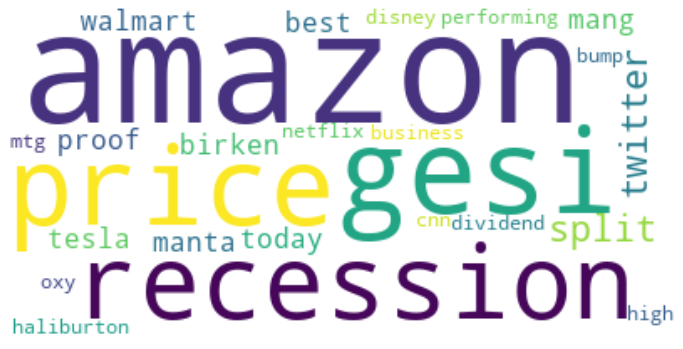

In [ ]:
data = d_full[(d_full['source_query']=='stocks')&(d_full['type']=='rising')&(d_full['geo']=='US')]

text = " ".join(i for i in data['query']).replace('stock','')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

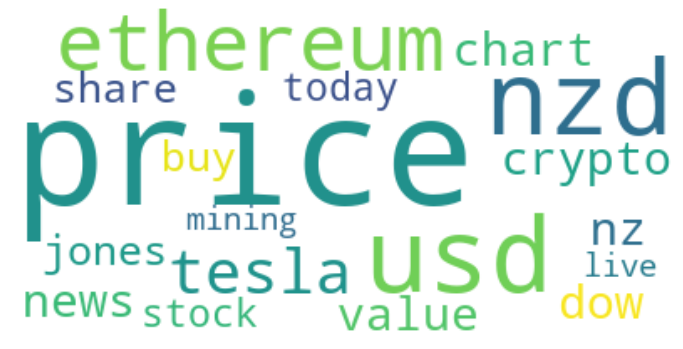

In [ ]:
data = d_full[(d_full['source_query']=='bitcoin')&(d_full['type']=='top')&(d_full['geo']=='NZ')]

text = " ".join(i for i in data['query']).replace('bitcoin','')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

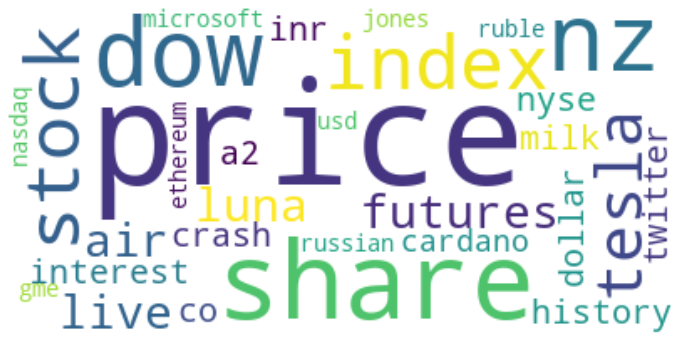

In [ ]:
data = d_full[(d_full['source_query']=='bitcoin')&(d_full['type']=='rising')&(d_full['geo']=='NZ')]

text = " ".join(i for i in data['query']).replace('bitcoin','')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
query_data = d_full[(d_full['source_query']=='bitcoin')&(d_full['type']=='rising')&(d_full['geo']=='US')]
query_data.head()

,query,value,source_query,type,geo
0,dwac stock,8700,bitcoin,rising,US
1,solana price,4650,bitcoin,rising,US
2,rivian stock,3150,bitcoin,rising,US
3,shiba inu price,2200,bitcoin,rising,US
4,shiba inu coin price,2050,bitcoin,rising,US


In [ ]:
kw_list = query_data.head()['query'].tolist() # list of keywords to get data 

In [ ]:
kw_list

['dwac stock',
 'solana price',
 'rivian stock',
 'shiba inu price',
 'shiba inu coin price']

In [ ]:
# build payload
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m') 

# Interest over Time
data = pytrend.interest_over_time() 
data = data.reset_index() 

In [ ]:
import plotly.express as px

fig = px.line(data, x="date", y=kw_list, title='Bitcoin related queries - Interest Over Time')
fig.show() 